## 人工知能? 機械学習? 深層学習?
(執筆中)
![](https://i2.wp.com/www.jamesserra.com/wp-content/uploads/2017/04/AI-Terms.png?resize=1024%2C642&ssl=1)
[James Serraのブログ](http://www.jamesserra.com/archive/2017/04/artificial-intelligence-defined/)より転載
### 人工知能(AI)
AIは、論理、if-thenルール、意思決定ツリー、機械学習（深層学習を含む）を使用して、コンピュータが人間の知能を模倣できるようにするあらゆる技術に適用される最も広い用語です。
### 機械学習
機械が経験によってタスクを改善することを可能にする、難解な統計的手法を含むAIのサブセットです。カテゴリには深層学習が含まれます。
### 深層学習(ディープラーニング)
多層神経ネットワーク(ディープニューラルネットワーク)を大量のデータにさらすことによって、音声や画像認識などのタスクを実行するソフトウェアの学習を可能にするアルゴリズムで構成された機械学習のサブセット。

## 機械学習の類型
人工知能研究の一分野。*データからモデルを作る装置。*

モデルとは? 「自然科学におけるモデルは、理論を説明するための簡単な具体的なもの。特に幾何学的な図形を用いた概念や物体。」本質を抽出し単純化したもの。
### 教師あり学習
入力データと出力データの対応関係を把握する。ラベル付き学習データに基き、未知データのラベルを予測するモデル。

* 顔認識
* 音声認識

人間の行動から学び、まねる装置を作る。
### 教師なし学習
ラベルのないデータをカテゴライズするモデル。どんなパターンがありうるかという情報なしに、データの隠れたパターンまたは特徴を発見すること。

例：
* ソーシャルネットワーク上の親しい友人の特定
* クレジットカード不正使用に対する行動異常の検出
* 分類、クラスタリングもたぶんこれに含まれる。データマイニング。

### 次元削減
高次元データに内在する低次元構造を検出するモデル。

### 回帰
統計学において、$Y$ が連続値の時にデータに $Y = f(X)$ というモデル(「定量的な関係の構造」)を当てはめる事。 別の言い方では、連続尺度の従属変数（目的変数）$Y$ と独立変数（説明変数）$X$ の間にモデルを当てはめること。

例：
* 最小二乗法

## 機械学習の例
### 教師なし学習の例
それぞれの手書き文字の画像は、8x8=64ピクセルの濃淡でできているので、64次元のベクトルとみなせる。これを、多様体学習と呼ばれる手法を用い、2次元に落としこむ。コンピュータはこのデータが6種類の数字でできていることは知らない。64次元空間で近い点(似た画像)は、2次元空間でも近くなるように、射影される。(実際の計算時間は瞬時)

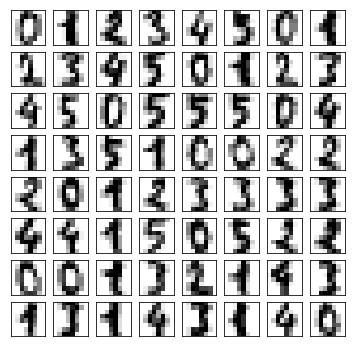

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# 画像データの読みこみ
digits = load_digits(n_class=6)

# 画像データの表示
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

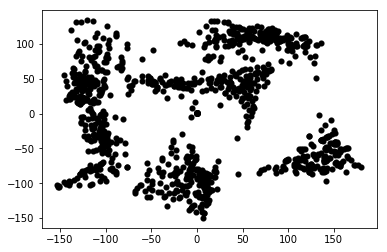

In [6]:
# IsoMap (多様体学習の一手法； 次元を削減し、データの構造を明らかにする)
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

# 結果の描画
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
           c='black')

それぞれの画像がどの数字を示しているかという情報もデータに含まれているが、コンピュータはそれを使わずにマッピングを行った。

その結果に対し、文字の種類ごとに異なる色を彩色してやると、6種類の文字が異なる島に分かれている=識別されていることがわかる。この例では、先験的な知識なしに、プログラムが文字をその形だけで分類できることを示している。

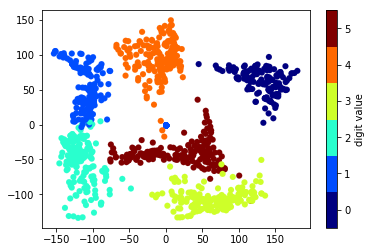

In [16]:
# 文字の種類ごとに異なる色を付けて描画
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
           c=digits.target, cmap=plt.cm.get_cmap('jet', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

ひとたびこのようなテリトリーの地図が得られると、未知の手書き文字を同じようにこの地図にのせることで、それがどの文字に一番近いかを「認識」できるようになる。

## 参考資料

* Pythonデータサイエンスハンドブック
* パターン認識と機械学習

### 教師あり学習の例
上の例では、2次元に落としこんだ時に、はっきりとしたクラスターが形成され、異なる文字の間の境界が自ずと明らかになった。しかし、いつもこんなにうまくクラスター化できるとは限らない。

学習の過程で、それぞれの画像がどの数字をあらわしているかをコンピュータに教えてやれば、その情報をもとに、異なる文字の境界線をコンピュータが自動的に定める。このような方法を教師あり学習と呼ぶ。

#### ランダムフォレスト法による文字分類
それぞれの文字の画像と読み方をセットで教え、機械学習アルゴリズムが分類方法を自動的に考える。

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

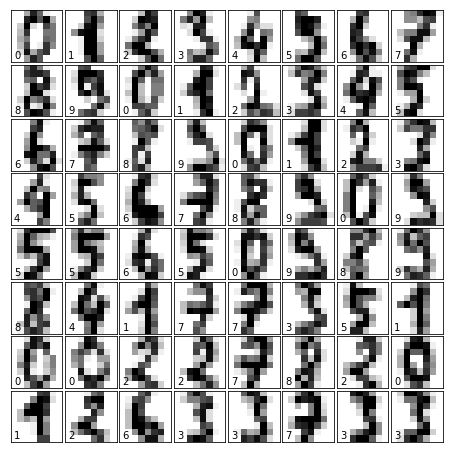

In [7]:
# taken from Python Data Science handbook

%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

# 画像データの表示
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
fig.subplots_adjust(left=0,right=1, bottom=0,top=1,hspace=0.05,wspace=0.05)
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.text(0,7,str(digits.target[i]))
    axi.set(xticks=[], yticks=[])
    
# 学習用データとテストデータの分割
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)


それを使って、未知データの推定を行う。

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       0.98      0.98      0.98        43
          2       0.95      1.00      0.98        42
          3       0.98      0.98      0.98        45
          4       0.97      1.00      0.99        37
          5       0.98      0.96      0.97        49
          6       1.00      1.00      1.00        52
          7       1.00      0.98      0.99        49
          8       0.98      0.98      0.98        48
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



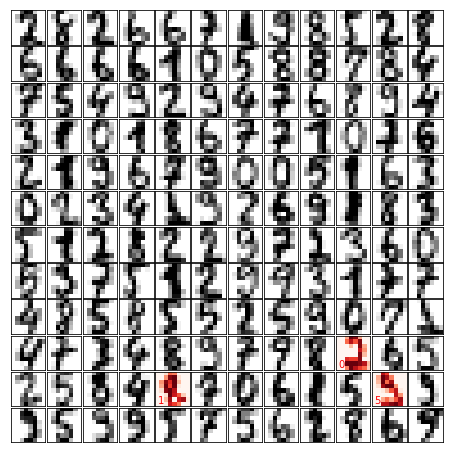

In [28]:
ypred = model.predict(Xtest)

# print(digits.images)
# print(Xtest)
# 画像データの表示
fig, ax = plt.subplots(12, 12, figsize=(6, 6))
fig.subplots_adjust(left=0,right=1, bottom=0,top=1,hspace=0.05,wspace=0.05)
for i, axi in enumerate(ax.flat):
    axi.set(xticks=[], yticks=[])

    if ypred[i] != ytest[i]:
        axi.text(0,7,str(ypred[i]), color='red')
        axi.imshow((Xtest[i]).reshape(8,8), cmap='Reds')
    else:
        axi.imshow(Xtest[i].reshape(8,8), cmap='binary')



from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

## ニューラルネットワーク入門
人工ニューラルネットワーク(ANN, 人工神経回路網)は、近年になって急激に脚光を浴びはじめた。

1. **これまでの手法の限界**
   教える(=認識する)内容が複雑になるにつれ、人によるパラメータチューニングに限界が見えてきた。

2. **NNにおけるブレークスルー**
   NN自体は1940年代から研究が始まっていたが、性能が伸び悩み、実用には向かないと考えられていた。今世紀に入りそれを打破する新しいアイディアにより、人の手助けなしに、自律的に極めて高度な学習ができるようになった。
   
3. **データ量の増大**
   デジタル写真や音声データが一般化し、膨大な教師データを準備できるようになった。
   
4. **計算機性能の向上**
   膨大な量のトレーニングができるようになった。
   
### ANNとは何か
神経細胞(ニューロン)の信号伝達をモデル化し、それを大量に組みあわせてネットワーク化して脳の信号処理を模倣する試み。脳機能を忠実に再現しているわけではない。

### 何ができるのか
画像や音声などの、大きなデータを入力し、分類、エンコーディング、認識、タグ付け、ノイズ除去などのさまざまなタスクを行う。最新のディープニューラルネットワークを用いると、画像認識、文字認識等で人間を越える能力を発揮する。

### ディープラーニングとは何か
ディープニューラルネットワークを用いた機械学習。

### ディープニューラルネットワークとは何か
ネットワークの階層性が深いニューラルネットワークのこと。2016年現在、「非常に深い」ニューラルネットワークとは *10層* 程度を指していたが、2018年にはすでに何十層もあるのがあたりまえになりつつある。基本的な構造はどのニューラルネットワークも同じだが、ディープニューラルネットワークを設計する場合には、各階層に役割を与える場合が多い。

### もてはやされる理由

1. 人力では達成不可能な複雑なタスクを実現できるようになった。

2. 学習過程での計算量は莫大だが、一旦学習したあとは、かけ算と足し算の組みあわせによる、わずかな計算しか必要としない = スマホ程度の計算能力で十分利用できる。

### 我々科学者の立ち位置
1. DNNの開発に参入するのは難しい。計算機シミュレーションのために、半導体設計から始めるようなもの。よほどの勝算がなければやめておいたほうがいい。
2. DNNで何ができ、何ができないかを理解した上で、DNNに適合するような問題設定を考える。既存のフレームワーク(TensorFlowなど)を使って自力で解くか、外部専門家に適切な要望を出して解決してもらう。

### フレームワーク
フレームワークとは、ニューラルネットワークを計算機に実装する一連の作業に必要なツール一式のこと。フレームワークが違うと、重みやバイアスといった変数をどんな形式で指定するか、バックプロパゲーションをどのように実施するか、などといった作業手順が違ってくる。

適切なフレームワークを選べば、計算機の性能を最大限にひきだせる。複数のGPUを使って計算を加速したり、外部のCloudに任せてしまうことすら可能。(例えばAmazonのクラウドAWSはMXNetやTensorFlowに対応しているらしい)

(July 2018)

|FW name | 公開年   | 開発主体 | 言語  |github|
|:---:|:---:|:------|:-----|:---|
|Theano |(2010) |MontrealU |Python|[Theano/Theano](https://github.com/Theano/Theano)
|Caffe   |2013     |UCB      |C++, Python|[BVLC/caffe](https://github.com/BVLC/caffe)
|Chainer |2015     |PFN      |Python |[chainer/chainer](https://github.com/chainer/chainer)
|CNTK    |2015      |Microsoft |Python|[Microsoft/CNTK](https://github.com/Microsoft/CNTK)
|TensorFlow | 2015 | Google | C++, Python |[tensorflow/tensorflow](https://github.com/tensorflow/tensorflow)
|neon    |2015   |Intel     |Python|[NervanaSystems/neon](https://github.com/NervanaSystems/neon)
|PyTorch |2016   |NYU, Facebook|Python|[pytorch/pytorch](https://github.com/pytorch/pytorch)
|NNabla  |2017   |Sony      |C++, Python   |[sony/nnabla](https://github.com/sony/nnabla)
|Caffe2  |2017     |Facebook |C++, Python|[caffe2/caffe2](https://github.com/caffe2/caffe2)
|MXNet   |2017     |WU, CMU  |Python, R, Julia, Go|[apache/incubator-mxnet](https://github.com/apache/incubator-mxnet)

* Pythonが書ければ、どれも使える。
* どのプロジェクトも、[github](https://github.com)でソースプログラムを公開している。
* https://qiita.com/bonotake/items/cbd44abbcbe333f264d8 などを参考に整理

## TensorFlowによる実装例
https://www.tensorflow.org/versions/r1.0/get_started/mnist/beginners をなぞってみる。


In [30]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [31]:
import tensorflow as tf

In [76]:
# 1段だけのNNを準備する (遅延評価)
x = tf.placeholder(tf.float32, [None, 784])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

<tf.Tensor 'Softmax_2:0' shape=(?, 10) dtype=float32>

In [35]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [77]:
# 評価関数の定義 (遅延評価)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y),
                                              reduction_indices=[1]))
cross_entropy

<tf.Tensor 'Mean_9:0' shape=() dtype=float32>

In [79]:
# 訓練方法の定義 (訓練データによる評価→バックプロパゲーション。遅延評価)
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
train_step

<tf.Operation 'GradientDescent_3' type=NoOp>

In [86]:
# 訓練セッションを作る。
sess = tf.InteractiveSession()

/anaconda2/envs/base3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [92]:
# 変数を初期化する
tf.global_variables_initializer().run()

In [94]:
# 訓練セッションの実行: 訓練データで1000回訓練する。
for _ in range(100):
    # 100組のランダムなデータを選ぶ
    batch_xs, batch_ys = mnist.train.next_batch(1000)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [95]:
# 性能評価関数の定義 (遅延評価)：
# y_ (正解)とy (推定)の、それぞれの最高確率のものが一致するかどうか
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [96]:
# 精度関数の定義 (遅延評価)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [97]:
# 検証セッションの実行
print(sess.run(accuracy, 
               feed_dict={x: mnist.test.images,
                          y_: mnist.test.labels}))

0.9213


テストデータセットでの正答率は92%。悪い。

In [98]:
sess.close()

### 性能改善
どうすれば良いか?
* 階層を増やす。
* 階層を増やすと過学習に陥る可能性がある。
  * トレーニングを増やす。
  * dropout(いくつかのリンクをランダムに外し、外乱に強いrobustなニューラルネットワークに育てる)

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

/Users/matto/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [20]:
import tensorflow as tf
sess = tf.InteractiveSession()

/Users/matto/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [21]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [22]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [23]:
sess.run(tf.global_variables_initializer())

In [24]:
y = tf.matmul(x,W) + b

In [25]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

In [26]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

# SoftMaxの代わりにReLUを使う場合、Biasはすこし与えたほうが良い。
def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

In [27]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [28]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

In [29]:
x_image = tf.reshape(x, [-1,28,28,1])

In [30]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [31]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [32]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [33]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [34]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [35]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_,
                                            logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())

for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  if i%1000 == 0:
    print("test accuracy %g"%accuracy.eval(feed_dict={
      x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))  
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
      x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))  



step 0, training accuracy 0.08
test accuracy 0.0925
step 100, training accuracy 0.82
step 200, training accuracy 0.84
step 300, training accuracy 0.94
step 400, training accuracy 0.96
step 500, training accuracy 0.92
step 600, training accuracy 0.94
step 700, training accuracy 0.98
step 800, training accuracy 0.98
step 900, training accuracy 1
step 1000, training accuracy 0.98
test accuracy 0.9628
step 1100, training accuracy 0.92
step 1200, training accuracy 0.94
step 1300, training accuracy 1
step 1400, training accuracy 1
step 1500, training accuracy 0.9
step 1600, training accuracy 1
step 1700, training accuracy 0.98
step 1800, training accuracy 0.96
step 1900, training accuracy 0.98
step 2000, training accuracy 1
test accuracy 0.9764
step 2100, training accuracy 0.98
step 2200, training accuracy 1
step 2300, training accuracy 0.98
step 2400, training accuracy 0.96
step 2500, training accuracy 0.92
step 2600, training accuracy 1
step 2700, training accuracy 1
step 2800, training ac

TensorFlowをそのまま使うとあまり読みやすくないので、Kerasでwrapしてみる。

* https://qiita.com/cvusk/items/2cd3e516276b426bc58c

In [75]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop

num_classes = 10

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


60000 train samples
10000 test samples


In [76]:
# Kerasのサンプルから切り貼り。もともとは数字用ではないかもしれない。

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

# 隠れ層が2枚あるNN?

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 64)          0         
__________

In [77]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [78]:
batch_size = 128
epochs = 50
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test))

In [79]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 0.023961885172068285
Test accuracy 0.9933


てきとうにサンプルから切り貼りした(最適化してない)DNNでも99.3%が達成された。

## 化学での応用